# Compare prediction

In [1]:
import sys
sys.path.insert(0,"/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0,"..")

import json
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import string
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from tree.parameters import Ts
from tree.utils import markers

# Load test results on radicalmarkers

In [2]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/random.json", "r") as f:
    train_inds, test_inds = json.load(f)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)

radical_data_df = pd.read_csv("../data/radical_data.csv")
radical_gav_df = pd.read_csv("../data/radical_gav.csv")

test_radical_data_df = radical_data_df[radical_data_df["smiles"].isin(test_df["radical_smiles"])]
test_radical_data_df = test_radical_data_df.reset_index(drop=True)
test_radical_gav_df = radical_gav_df[radical_gav_df["smiles"].isin(test_df["radical_smiles"])]
test_radical_gav_df = test_radical_gav_df.reset_index(drop=True)

test_radical_sidt_df = pd.read_csv("../models/split-random_run-aleatoric_prepruning-upper_bound/frac-1.0/test_radical.csv")
test_radical_sidt_df

,radical_smiles,H298 (kcal/mol),S298 (cal/mol/K),Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K),comment
0,[O]C(=O)OC(=O)O,-175.469790,84.080735,28.387505,32.570774,35.109357,37.022046,38.764725,39.088809,37.903059,Thermo group additivity estimation: group(O2s-...
1,CC(=O)COC(O[O])OC(C)=O,-154.665989,136.091115,46.739279,54.819261,63.001727,70.410243,82.184670,90.456302,101.195359,Thermo group additivity estimation: group(O2s-...
2,[O]OC(=O)OC(=O)O,-157.909442,89.385512,30.946395,36.115151,39.108763,41.152616,43.540604,44.565908,44.806515,Thermo group additivity estimation: group(O2s-...
3,C[C]1OC(=O)C(O)(C=O)O1,-150.746878,105.055268,35.291629,42.054000,48.043727,52.899268,60.321924,65.427980,74.486164,Thermo group additivity estimation: group(O2s-...
4,CC1(OO)COC(O[O])C(=O)O1,-132.077719,110.194410,47.097572,55.885851,63.784776,70.052221,78.273454,84.648906,92.775708,Thermo group additivity estimation: group(O2s-...
...,...,...,...,...,...,...,...,...,...,...,...
217,C=CC#CCO[O],85.786900,90.529380,26.706960,32.640750,36.929980,41.928740,47.728090,52.058380,58.441970,Thermo group additivity estimation: group(O2s-...
218,[C]1=CC=CC1,94.873000,69.536610,17.676192,23.598190,28.535210,32.514590,38.371880,42.379700,48.199380,Thermo group additivity estimation: group(Cs-(...
219,[CH]1C=C1,102.280900,56.304132,12.762741,14.951170,16.996190,18.887830,21.902970,24.032510,27.334670,Thermo group additivity estimation: group(Cs-(...
220,[CH]=CC=C=C,120.458874,51.574044,22.031756,27.236924,30.952042,33.800005,37.914383,40.673444,44.813790,Thermo group additivity estimation: group(Cds-...


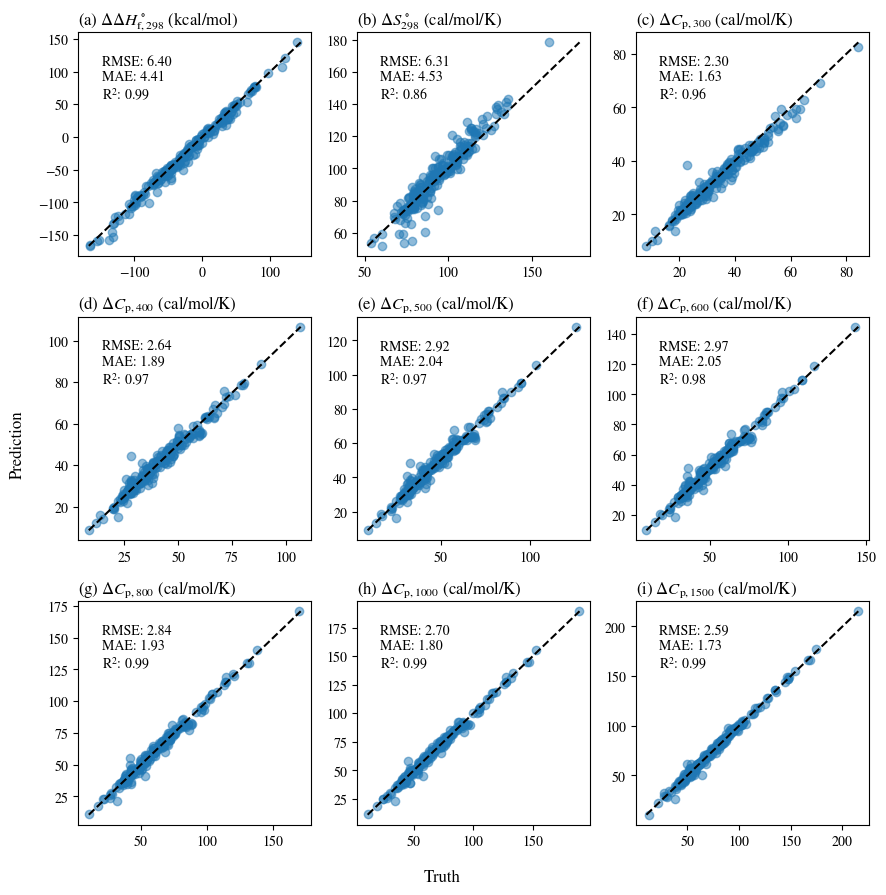

In [3]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_radical_data_df["H298 (kcal/mol)"]
pred_ys = test_radical_gav_df["H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_radical_data_df["S298 (cal/mol/K)"]
pred_ys = test_radical_gav_df["S298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_radical_data_df[f"Cp{T} (cal/mol/K)"]
    pred_ys = test_radical_gav_df[f"Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/radical_empirical_parity.pdf", bbox_inches="tight")

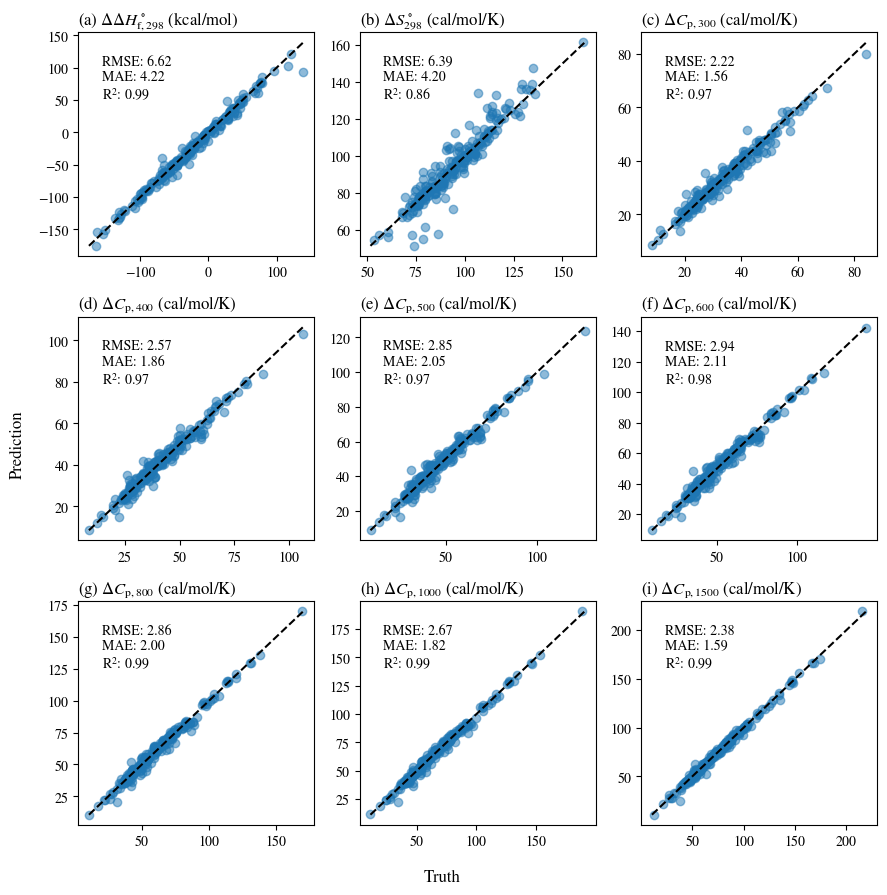

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_radical_data_df["H298 (kcal/mol)"]
pred_ys = test_radical_sidt_df["H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_radical_data_df["S298 (cal/mol/K)"]
pred_ys = test_radical_sidt_df["S298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_radical_data_df[f"Cp{T} (cal/mol/K)"]
    pred_ys = test_radical_sidt_df[f"Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/radical_sidt_parity.pdf", bbox_inches="tight")

# Load test results on HBI

In [6]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/random.json", "r") as f:
    train_inds, test_inds = json.load(f)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)
empirical_df = pd.read_csv("../data/hbi_prediction_empirical.csv")
empirical_df = empirical_df.loc[test_inds, :]
empirical_df = empirical_df.reset_index(drop=True)

In [7]:
sidt_df = pd.read_csv("../models/split-random_run-aleatoric_prepruning-upper_bound/frac-1.0/test.csv")
empirical_retrained_df = pd.read_csv("../models/split-random_run-retrain_empirical/test.csv")

# Plot: error distribution

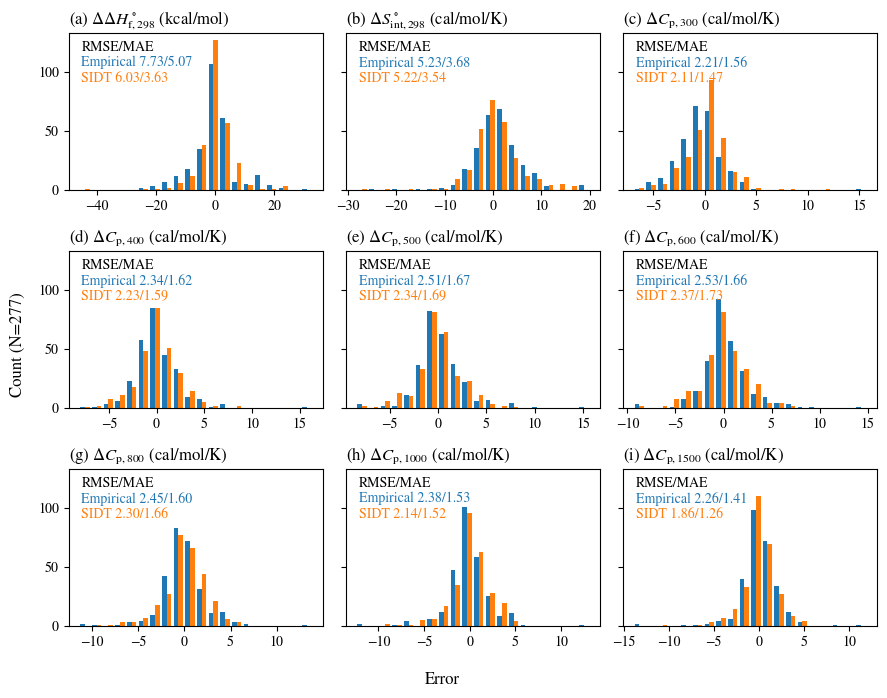

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins)
    ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
    ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
    ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/empirical_vs_sidt_error_hist.pdf", bbox_inches="tight")

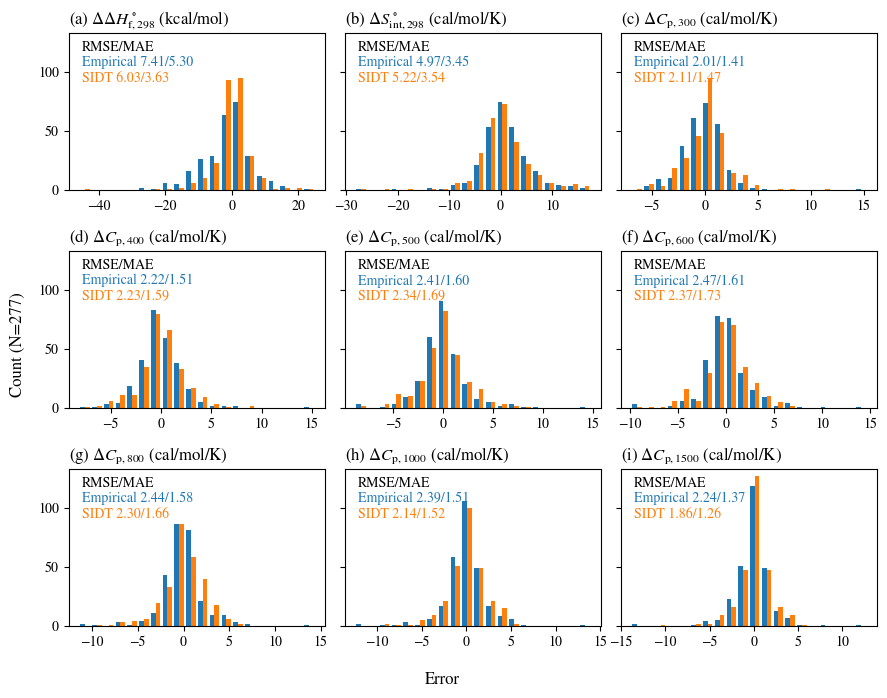

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_retrained_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins)
    ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
    ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
    ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/empirical_retrained_vs_sidt_error_hist.pdf", bbox_inches="tight")

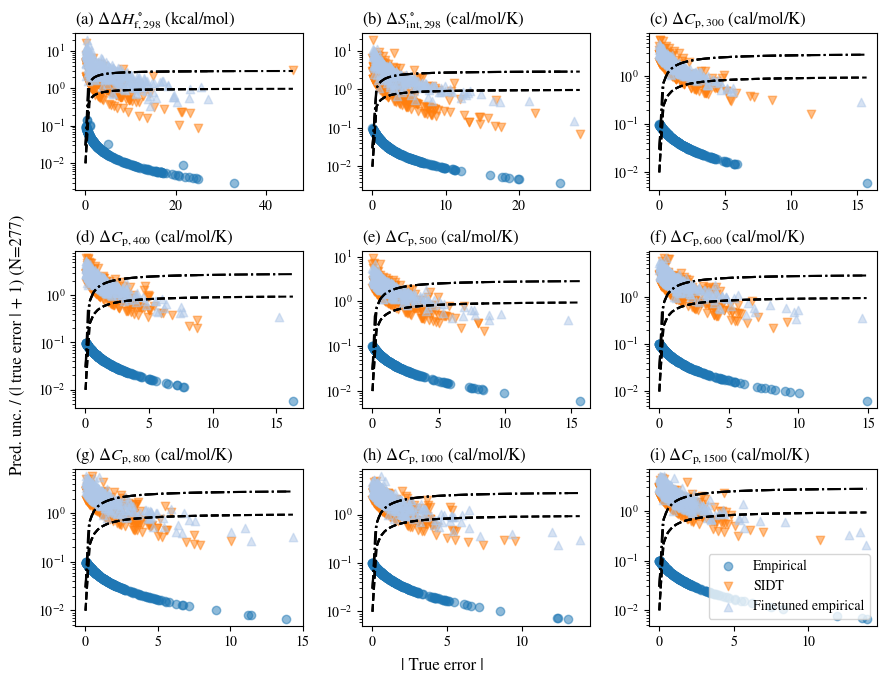

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))

colors = {
    "Empirical": plt.get_cmap("tab20")(0),
    "SIDT": plt.get_cmap("tab20")(2),
    "Finetuned empirical": plt.get_cmap("tab20")(1),
}
counter = 0

for df_i, (temp_df, df_label) in enumerate(zip([empirical_df, sidt_df, empirical_retrained_df, ], ["Empirical", "SIDT", "Finetuned empirical", ])):
        
        ax = axs.flat[0]
        label = "HBI_H298 (kcal/mol)"
        true_ys = test_df[label].values
        pred_ys = temp_df[label].values
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=colors[df_label])
        xs = np.linspace(1e-2, max(true_errs), 50)
        ax.plot(xs, xs / (xs + 1), "k--")
        ax.plot(xs, 3*xs / (xs + 1), "k-.")
        ax.set_yscale("log")
        ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

        ax = axs.flat[1]
        label = "HBI_Sint298 (cal/mol/K)"
        true_ys = test_df[label]
        pred_ys = temp_df[label]
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=colors[df_label])
        xs = np.linspace(1e-2, max(true_errs), 50)
        ax.plot(xs, xs / (xs + 1), "k--")
        ax.plot(xs, 3*xs / (xs + 1), "k-.")
        ax.set_yscale("log")
        ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

        for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
            label = f"HBI_Cp{T} (cal/mol/K)"
            true_ys = test_df[label]
            pred_ys = temp_df[label]
            pred_uncs = temp_df["unc_"+label].values
            true_errs = np.abs(pred_ys - true_ys)
            if df_label == "Empirical":
                pred_uncs[pred_uncs==0.0] = 0.1
            ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=colors[df_label])
            xs = np.linspace(1e-2, max(true_errs), 50)
            ax.plot(xs, xs / (xs + 1), "k--")
            ax.plot(xs, 3*xs / (xs + 1), "k-.")
            ax.set_yscale("log")
            ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
            
        counter += 1

axs.flat[-1].legend()
fig.supylabel(f"Pred. unc. / (| true error | + 1) (N={len(test_df.index)})")
fig.supxlabel(f"| True error |", y=0.03)
fig.tight_layout()

fig.savefig("../figures/unc_div_true_error_vs_true_error_sidt_vs_empirical_finetuned_empirical.pdf", bbox_inches="tight")

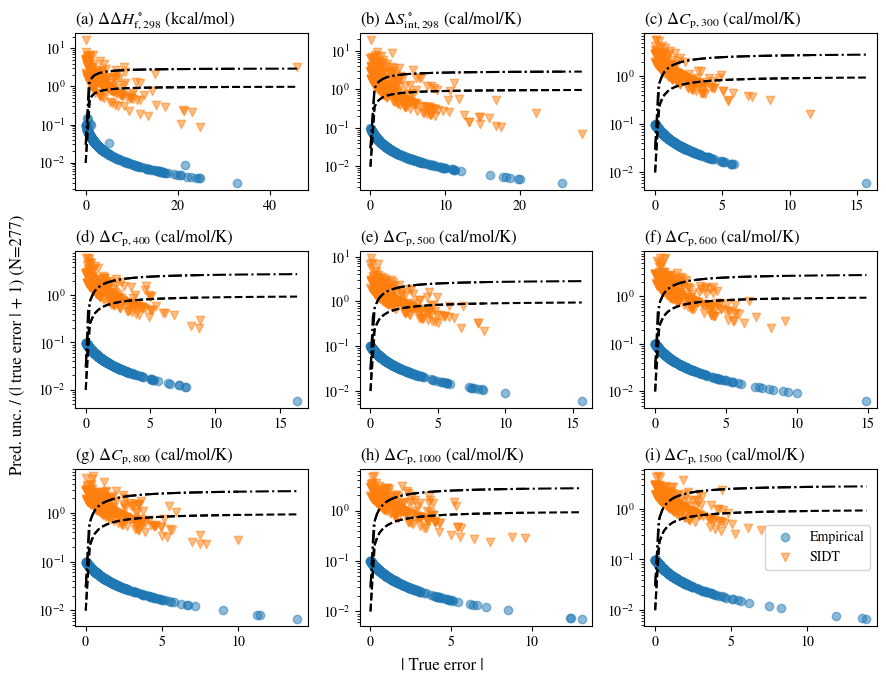

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))

colors = {
    "Empirical": plt.get_cmap("tab20")(0),
    "SIDT": plt.get_cmap("tab20")(2),
    "Finetuned empirical": plt.get_cmap("tab20")(1),
}
counter = 0

for df_i, (temp_df, df_label) in enumerate(zip([empirical_df, sidt_df], ["Empirical", "SIDT"])):
        
        ax = axs.flat[0]
        label = "HBI_H298 (kcal/mol)"
        true_ys = test_df[label].values
        pred_ys = temp_df[label].values
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=colors[df_label])
        xs = np.linspace(1e-2, max(true_errs), 50)
        ax.plot(xs, xs / (xs + 1), "k--")
        ax.plot(xs, 3*xs / (xs + 1), "k-.")
        ax.set_yscale("log")
        ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

        ax = axs.flat[1]
        label = "HBI_Sint298 (cal/mol/K)"
        true_ys = test_df[label]
        pred_ys = temp_df[label]
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=colors[df_label])
        xs = np.linspace(1e-2, max(true_errs), 50)
        ax.plot(xs, xs / (xs + 1), "k--")
        ax.plot(xs, 3*xs / (xs + 1), "k-.")
        ax.set_yscale("log")
        ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

        for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
            label = f"HBI_Cp{T} (cal/mol/K)"
            true_ys = test_df[label]
            pred_ys = temp_df[label]
            pred_uncs = temp_df["unc_"+label].values
            true_errs = np.abs(pred_ys - true_ys)
            if df_label == "Empirical":
                pred_uncs[pred_uncs==0.0] = 0.1
            ax.scatter(true_errs, pred_uncs / (true_errs + 1), label=df_label, marker=markers[counter], alpha=0.5, color=colors[df_label])
            xs = np.linspace(1e-2, max(true_errs), 50)
            ax.plot(xs, xs / (xs + 1), "k--")
            ax.plot(xs, 3*xs / (xs + 1), "k-.")
            ax.set_yscale("log")
            ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
            
        counter += 1

axs.flat[-1].legend()
fig.supylabel(f"Pred. unc. / (| true error | + 1) (N={len(test_df.index)})")
fig.supxlabel(f"| True error |", y=0.03)
fig.tight_layout()

fig.savefig("../figures/unc_div_true_error_vs_true_error_sidt_vs_empirical.pdf", bbox_inches="tight")

# Analyze outliers

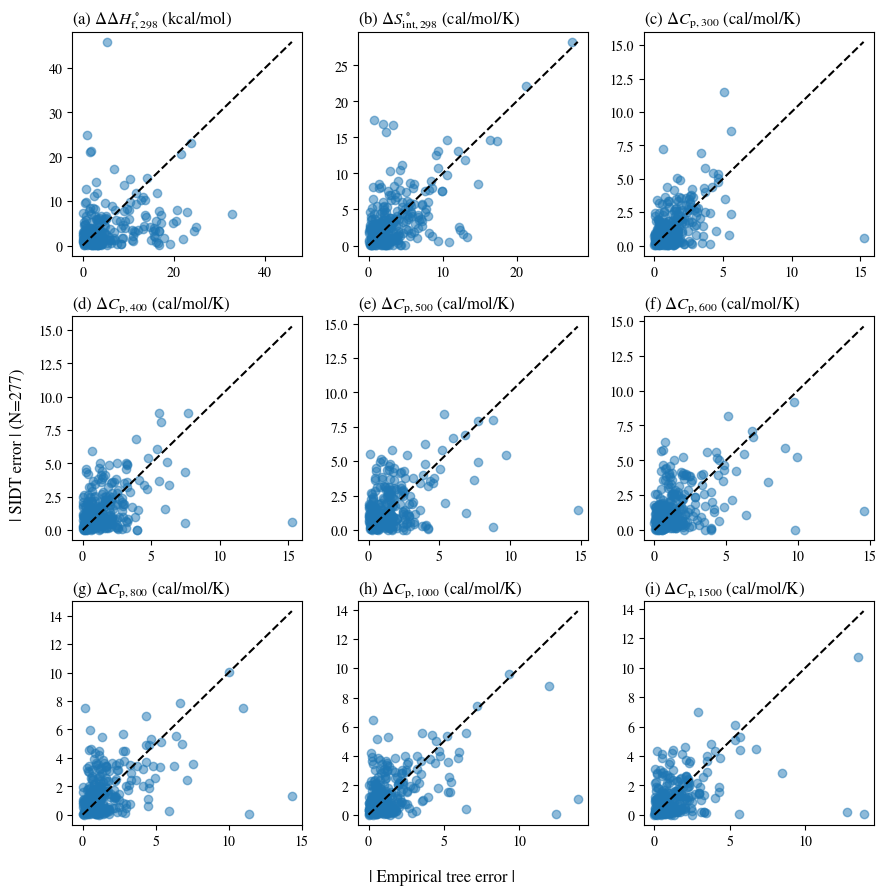

In [39]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = (pred_ys - true_ys).abs()

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = (pred_ys - true_ys).abs()

min_y = min(empirical_errors.min(), sidt_errors.min())
max_y = max(empirical_errors.max(), sidt_errors.max())
ax.scatter(empirical_errors, sidt_errors, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = (pred_ys - true_ys).abs()

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = (pred_ys - true_ys).abs()

min_y = min(empirical_errors.min(), sidt_errors.min())
max_y = max(empirical_errors.max(), sidt_errors.max())
ax.scatter(empirical_errors, sidt_errors, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_retrained_df[label]
    empirical_errors = (pred_ys - true_ys).abs()

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = (pred_ys - true_ys).abs()

    min_y = min(empirical_errors.min(), sidt_errors.min())
    max_y = max(empirical_errors.max(), sidt_errors.max())
    ax.scatter(empirical_errors, sidt_errors, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel("| SIDT error |"+f" (N={len(test_df.index)})")
fig.supxlabel("| Empirical tree error |")

fig.tight_layout()
fig.savefig("../figures/empirical_error_vs_sidt_error_parity.pdf", bbox_inches="tight")

In [51]:
# label = "HBI_Sint298 (cal/mol/K)"
label = "HBI_H298 (kcal/mol)"
temp_df = empirical_df
true_ys = test_df[label]
pred_ys = temp_df[label]
errors = pred_ys - true_ys
temp_df["err"] = errors.abs()
temp_df = temp_df.sort_values("err", ascending=False)
temp_df[["resonance_radical_smiles", label, "err", "comment"]]

,resonance_radical_smiles,HBI_H298 (kcal/mol),err,comment
45,[O]C(O)=C=O,85.587954,32.857619,(C=COJ)
93,C=CC=C([O])OC,85.587954,24.872993,(C=COJ)
205,O[C]1C=CC=C1,94.500000,24.531265,(C2CsJOH)
102,C[CH]C(OO)OCOO,99.980000,23.853523,(CCJCOOH)
41,CC(C)(O[O])C(O)=CO,85.300000,22.891588,(C3COOJ)
...,...,...,...,...
268,[CH]=CCC(=C)C,111.200000,0.077532,(Cds_P)
126,[CH2]OCCCOO,96.830000,0.050182,(CsJOCC)
67,CC[C](C=O)CO,88.288719,0.045958,(CCJ(C)CO)
17,CC(=O)OC([O])CC1CO1,105.855641,0.014842,(CCOJ)


In [53]:
temp_df[temp_df["comment"]=="(C=COJ)"]

,resonance_radical_smiles,HBI_H298 (kcal/mol),unc_HBI_H298 (kcal/mol),HBI_Sint298 (cal/mol/K),unc_HBI_Sint298 (cal/mol/K),HBI_Cp300 (cal/mol/K),unc_HBI_Cp300 (cal/mol/K),HBI_Cp400 (cal/mol/K),unc_HBI_Cp400 (cal/mol/K),HBI_Cp500 (cal/mol/K),...,HBI_Cp600 (cal/mol/K),unc_HBI_Cp600 (cal/mol/K),HBI_Cp800 (cal/mol/K),unc_HBI_Cp800 (cal/mol/K),HBI_Cp1000 (cal/mol/K),unc_HBI_Cp1000 (cal/mol/K),HBI_Cp1500 (cal/mol/K),unc_HBI_Cp1500 (cal/mol/K),comment,err
45,[O]C(O)=C=O,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),32.857619
93,C=CC=C([O])OC,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),24.872993
39,C=C([O])OCCOO,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),19.831680
55,CC=C([O])O,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),19.133713
57,[O]C1=C(O)COO1,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),16.728372
21,C=C([O])OC(OO)C(C)C,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),16.198490
73,C=C([O])O,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),13.632027
81,C=C([O])OC,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),13.269733
87,[O]C=C1CC=C(O)C1OO,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),8.478282
68,CCC(=C[O])CO,85.587954,0.0,0.788719,0.0,-2.413958,0.0,-3.226577,0.0,-3.489484,...,-3.489484,0.0,-3.417782,0.0,-3.465583,0.0,-3.824092,0.0,(C=COJ),4.653285


In [54]:
temp_df = sidt_df
true_ys = test_df[label]
pred_ys = temp_df[label]
errors = pred_ys - true_ys
temp_df["err"] = errors.abs()
temp_df = temp_df.sort_values("err", ascending=False)
temp_df

,resonance_radical_smiles,HBI_H298 (kcal/mol),unc_HBI_H298 (kcal/mol),HBI_Sint298 (cal/mol/K),unc_HBI_Sint298 (cal/mol/K),HBI_Cp300 (cal/mol/K),unc_HBI_Cp300 (cal/mol/K),HBI_Cp400 (cal/mol/K),unc_HBI_Cp400 (cal/mol/K),HBI_Cp500 (cal/mol/K),...,HBI_Cp600 (cal/mol/K),unc_HBI_Cp600 (cal/mol/K),HBI_Cp800 (cal/mol/K),unc_HBI_Cp800 (cal/mol/K),HBI_Cp1000 (cal/mol/K),unc_HBI_Cp1000 (cal/mol/K),HBI_Cp1500 (cal/mol/K),unc_HBI_Cp1500 (cal/mol/K),comment,err
276,C1#CC=CC[CH]1,35.7554,148.0860,2.604230,3.00000,0.607198,3.00000,0.446397,3.00000,0.164720,...,0.020995,6.0454,0.141406,7.34636,0.047473,9.16388,-0.118461,12.6274,(RJ1_1R-inRing_Ext-1R-R_Ext-2R!H-R_N-Sp-3R!H=2...,45.904873
53,[CH2]CC(OO)OCOO,126.8990,2.2000,20.270800,2.00000,6.503800,2.00000,2.409400,2.00000,-0.850670,...,-3.020500,2.0000,-5.983160,2.00000,-7.632730,2.00000,-8.617050,2.0000,(RJ1_N-1R-inRing_1R->C_Ext-1C-R_Sp-2R!H-1C_2R!...,24.856954
102,C[CH]C(OO)OCOO,100.7020,5.2000,1.113270,3.00000,2.582710,3.00000,1.555660,3.00000,0.083474,...,-0.750709,3.0000,-1.749690,3.00000,-3.365490,3.00000,-5.037190,3.0000,(RJ1_N-1R-inRing_1R->C_Ext-1C-R_Sp-2R!H-1C_2R!...,23.131523
217,C=C(C)CC1C=C[CH]CC1C,104.5210,5.2000,-0.200247,6.73160,1.191230,6.08767,0.748535,5.66371,-0.354183,...,-1.291580,3.0000,-2.492740,3.00000,-2.881830,3.00000,-4.419690,3.0000,(RJ1_1R-inRing_Ext-1R-R_Ext-2R!H-R_Sp-3R!H=2R!...,21.314184
216,C=C(C)CC1[CH]C=CCC1C,104.5210,5.2000,-0.200247,6.73160,1.191230,6.08767,0.748535,5.66371,-0.354183,...,-1.291580,3.0000,-2.492740,3.00000,-2.881830,3.00000,-4.419690,3.0000,(RJ1_1R-inRing_Ext-1R-R_Ext-2R!H-R_Sp-3R!H=2R!...,21.064184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,C=C(C)COOC1[CH]C=C(C)CC1,82.3101,5.2000,-4.645890,3.00000,-0.159216,3.00000,-2.737050,3.00000,-4.640210,...,-5.400300,3.0000,-5.648800,3.00000,-5.991590,3.00000,-6.102440,3.0000,(RJ1_1R-inRing_Ext-1R-R_Ext-2R!H-R_Sp-3R!H=2R!...,0.066289
248,C=C=C(C)CO[O],85.7620,5.2000,-2.109300,5.70044,-1.866680,5.28202,-3.464020,3.95415,-4.514610,...,-5.121840,3.0000,-5.316260,3.00000,-5.690350,3.00000,-6.186720,3.0000,(RJ1_N-1R-inRing_N-1R->C_Ext-1HNO-R_N-2R!H->C_...,0.045153
96,COC=C(C)[C](C)C=O,84.2240,17.2401,-4.971650,4.55568,-3.536770,3.32771,-5.384640,3.00000,-5.918930,...,-5.490510,3.0000,-4.056560,3.07616,-3.059380,3.00000,-2.396610,3.0000,(RJ1_N-1R-inRing_1R->C_Ext-1C-R_Sp-2R!H-1C_2R!...,0.031886
72,[CH2]C(=O)O,99.3750,5.2000,-2.540360,6.97298,1.320820,3.00000,1.004260,3.00000,0.439474,...,-0.113330,3.0000,-1.075950,3.00000,-1.919480,3.00000,-3.552560,3.0000,(RJ1_N-1R-inRing_1R->C_Ext-1C-R_Sp-2R!H-1C_2R!...,0.013728


In [47]:
temp_df.columns

Index(['resonance_radical_smiles', 'HBI_H298 (kcal/mol)',
       'unc_HBI_H298 (kcal/mol)', 'HBI_Sint298 (cal/mol/K)',
       'unc_HBI_Sint298 (cal/mol/K)', 'HBI_Cp300 (cal/mol/K)',
       'unc_HBI_Cp300 (cal/mol/K)', 'HBI_Cp400 (cal/mol/K)',
       'unc_HBI_Cp400 (cal/mol/K)', 'HBI_Cp500 (cal/mol/K)',
       'unc_HBI_Cp500 (cal/mol/K)', 'HBI_Cp600 (cal/mol/K)',
       'unc_HBI_Cp600 (cal/mol/K)', 'HBI_Cp800 (cal/mol/K)',
       'unc_HBI_Cp800 (cal/mol/K)', 'HBI_Cp1000 (cal/mol/K)',
       'unc_HBI_Cp1000 (cal/mol/K)', 'HBI_Cp1500 (cal/mol/K)',
       'unc_HBI_Cp1500 (cal/mol/K)', 'comment', 'err'],
      dtype='object')

# Plot: parity plot

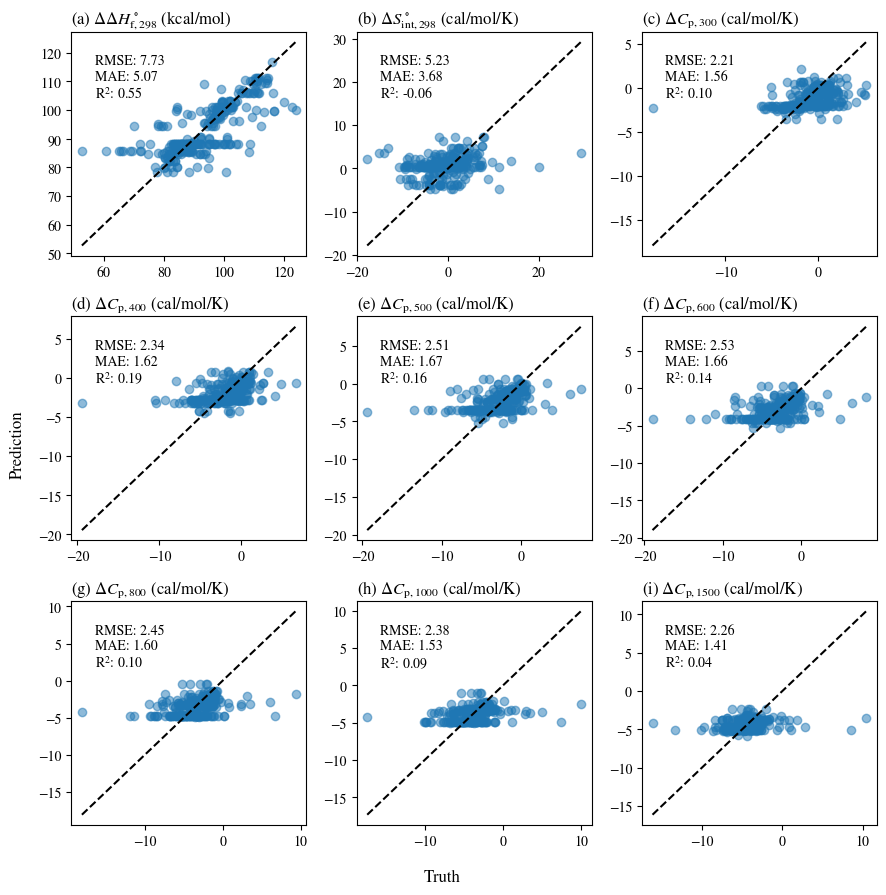

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/empirical_parity.pdf", bbox_inches="tight")

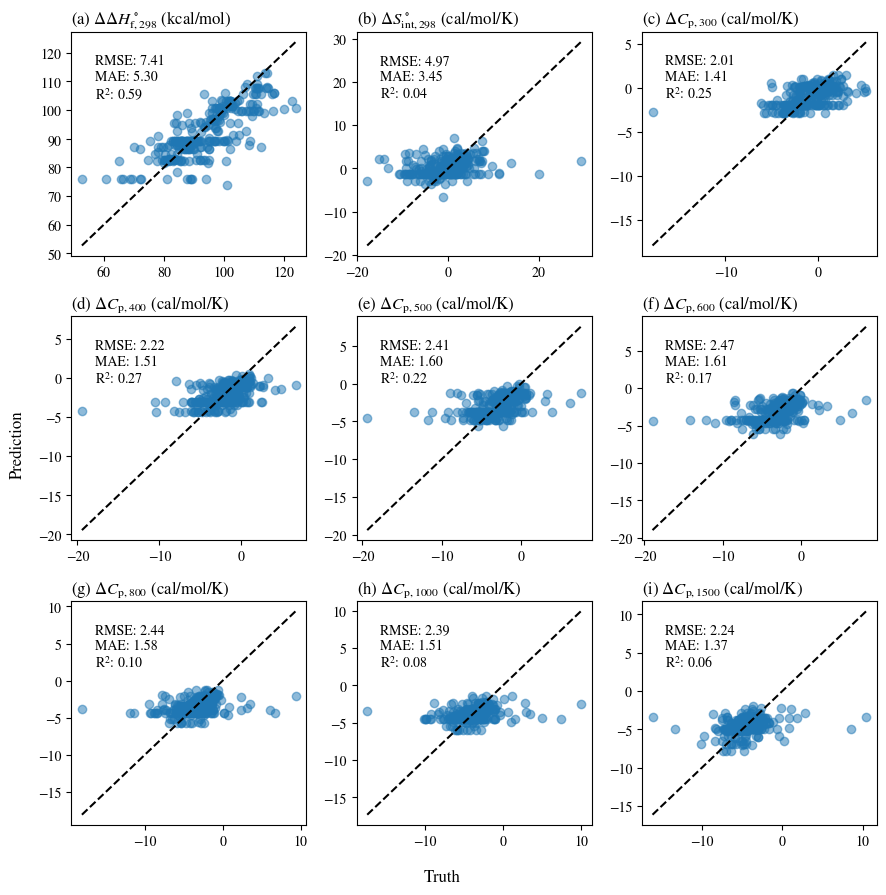

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_retrained_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_retrained_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_retrained_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/empirical_retrained_parity.pdf", bbox_inches="tight")

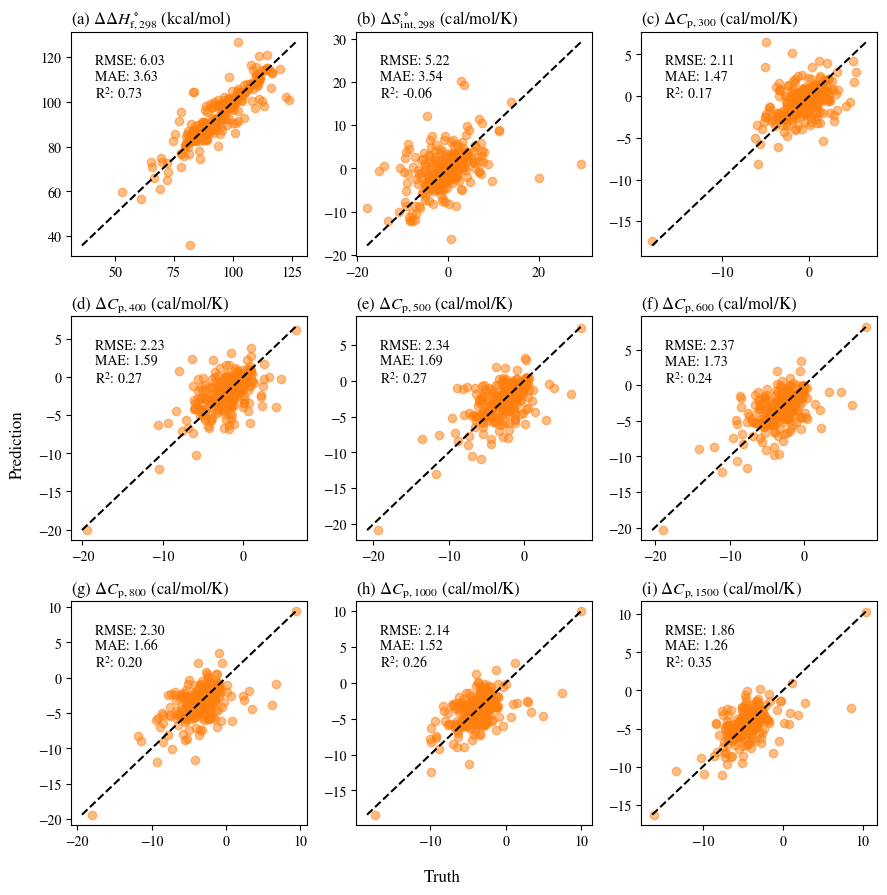

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = sidt_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = sidt_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = sidt_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/sidt_parity.pdf", bbox_inches="tight")

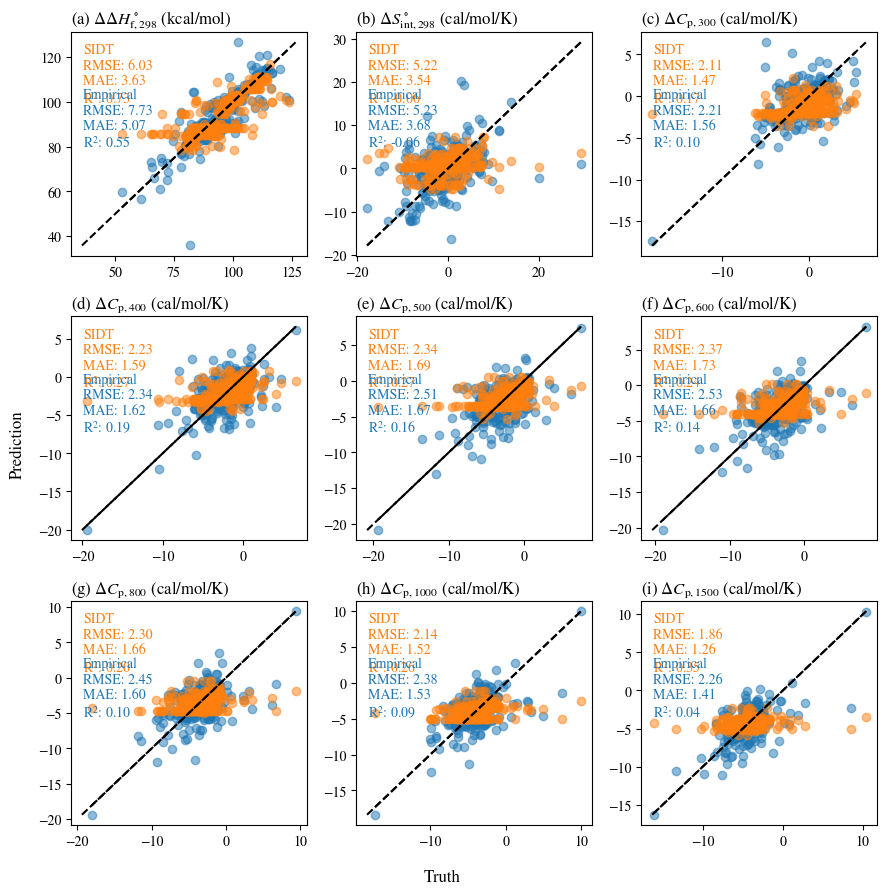

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

for df_i, (temp_df, df_label) in enumerate(zip([sidt_df, empirical_df], ["SIDT", "Empirical"])):

    ax = axs.flat[0]
    true_ys = test_df["HBI_H298 (kcal/mol)"]
    pred_ys = temp_df["HBI_H298 (kcal/mol)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5, label=df_label)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.05, 0.95-0.3*df_i, f"""{df_label}
RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes, color=colors[df_label])
    ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

    ax = axs.flat[1]
    true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
    pred_ys = temp_df["HBI_Sint298 (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5, label=df_label)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.05, 0.95-0.3*df_i, f"""{df_label}
RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes, color=colors[df_label])
    ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

    for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
        true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
        pred_ys = temp_df[f"HBI_Cp{T} (cal/mol/K)"]
        min_y = min(true_ys.min(), pred_ys.min())
        max_y = max(true_ys.max(), pred_ys.max())
        rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
        mae = mean_absolute_error(true_ys, pred_ys)
        r2 = r2_score(true_ys, pred_ys)
        ax.scatter(true_ys, pred_ys, alpha=0.5, label=df_label)
        ax.plot([min_y, max_y], [min_y, max_y], "k--")
        ax.text(0.05, 0.95-0.3*df_i, f"""{df_label}
RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes, color=colors[df_label])
        ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
# fig.savefig("../figures/sidt_empirical_parity.pdf", bbox_inches="tight")

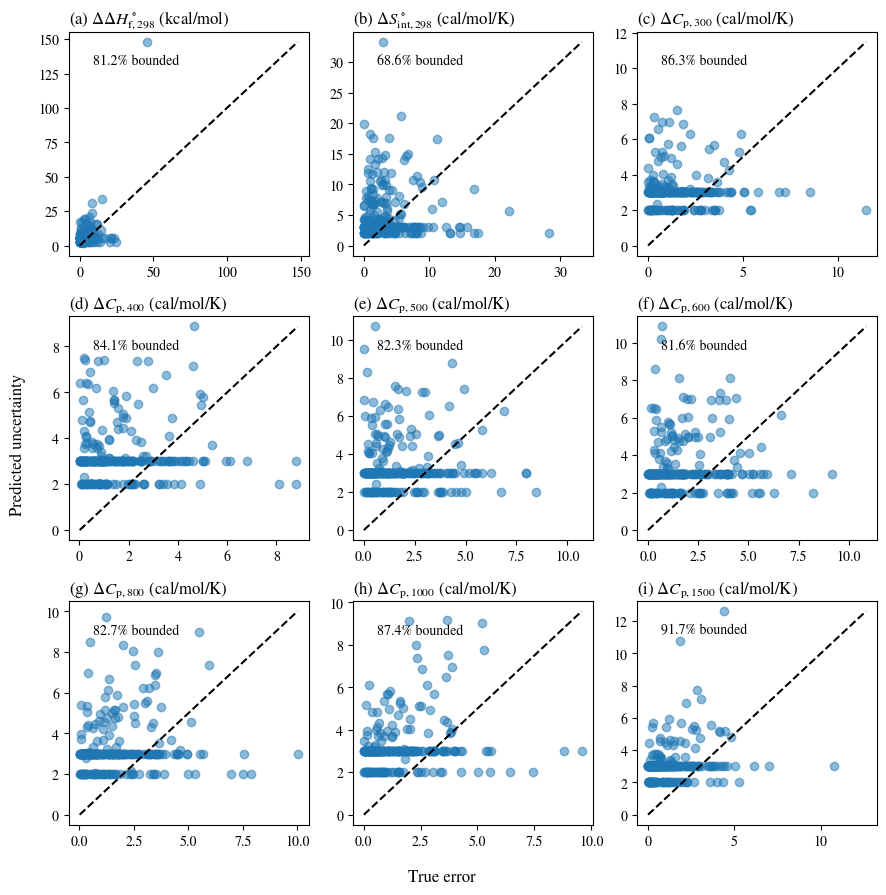

In [56]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = (sidt_df["HBI_H298 (kcal/mol)"] - test_df["HBI_H298 (kcal/mol)"]).abs()
pred_ys = sidt_df["unc_HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

ax = axs.flat[1]
true_ys = (sidt_df["HBI_Sint298 (cal/mol/K)"] - test_df["HBI_Sint298 (cal/mol/K)"]).abs()
pred_ys = sidt_df["unc_HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = (sidt_df[f"HBI_Cp{T} (cal/mol/K)"] - test_df[f"HBI_Cp{T} (cal/mol/K)"]).abs()
    pred_ys = sidt_df[f"unc_HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
    ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
    # ax.set_yscale("log")
    # ax.set_xscale("log")

fig.supylabel(f"Predicted uncertainty")
fig.supxlabel(f"True error")

fig.tight_layout()
fig.savefig("../figures/sidt_unc_vs_true_error_parity.pdf", bbox_inches="tight")